In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [11]:
# Load dataset
df = pd.read_csv("realistic_membership_data.csv")


# Features and target
X = df.drop(columns=["ID", "Avails_Membership"])
y = df["Avails_Membership"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

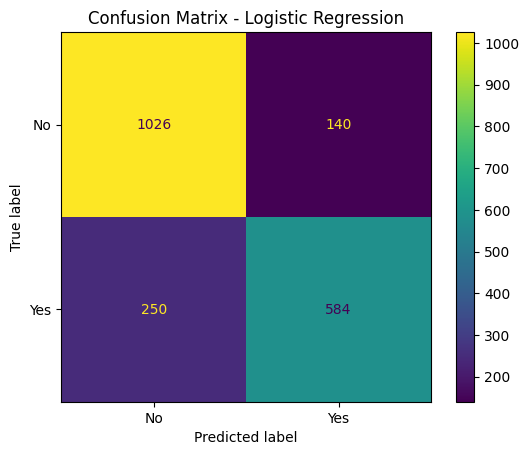

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1166
           1       0.81      0.70      0.75       834

    accuracy                           0.81      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.81      0.81      0.80      2000



In [12]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["No", "Yes"])
disp_log.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification report
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log))

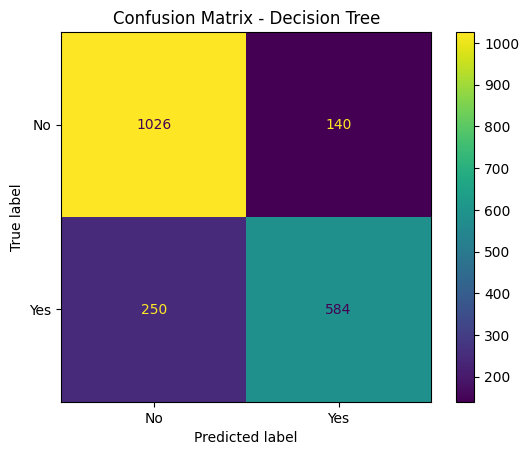

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1166
           1       0.81      0.70      0.75       834

    accuracy                           0.81      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.81      0.81      0.80      2000



In [14]:
# Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["No", "Yes"])
disp_tree.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Classification report
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_tree))

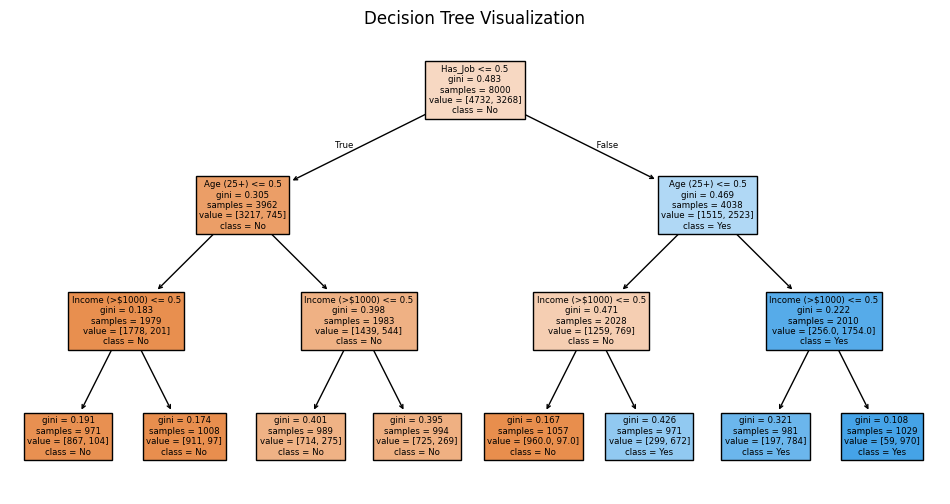

In [15]:
plt.figure(figsize=(12,6))
plot_tree(tree_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()